# Spam Classification NLP- LightGBM Model

Please UPVOTE this notebook if you find it insightful!

Thanks in advance.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-classification-for-basic-nlp/Spam Email raw text for NLP.csv


In [2]:
#importing libraries
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#importing dataset
df = pd.read_csv("/kaggle/input/spam-classification-for-basic-nlp/Spam Email raw text for NLP.csv")
df.head(10)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
5,1,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...,00187.efd97ab2034b3384606e21db00014ecb
6,1,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",00500.85b72f09f6778a085dc8b6821965a76f
7,1,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,00493.1c5f59825f7a246187c137614fb1ea82
8,1,"<table width=""600"" border=""20"" align=""center"" ...",00012.381e4f512915109ba1e0853a7a8407b2
9,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",00487.139a2f4e8edbbdd64441536308169d74


In [5]:
#shape of dataset
df.shape

(5796, 3)

In [6]:
#checking for null values
df.isna().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [7]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [10]:
df.CATEGORY.unique()

array([1, 0])

Dependent variable(CATEGORY) is already encoded, so no need to apply encoding.

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

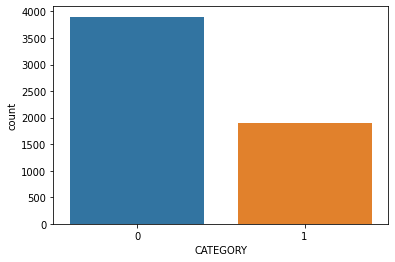

In [11]:
sns.countplot(df["CATEGORY"])

In [12]:
df["CATEGORY"].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

# Cleaning Text

In [13]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

In [14]:
standardize_text(df,"MESSAGE")

,CATEGORY,MESSAGE,FILE_NAME
0,1,"dear homeowner,\n\n \n\ninterest rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,attention this is a must for all computer use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,this is a multi part message in mime format \n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,important information \n\n\n\nthe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,this is the bottom line if you can give away...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"i'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,damien morton quoted \n\n w3c approves html 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"on mon, 2002 07 22 at 06 50, che wrote \n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"once upon a time, manfred wrote \n\n\n\n i w...",01178.5c977dff972cd6eef64d4173b90307f0


In [15]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(df)):
    message = re.sub('[^a-zA-Z]', ' ', df['MESSAGE'][i])
    message = message.split()
    message =[word for word in message if not word in set(stopwords.words('english'))]
    message = [lemmatizer.lemmatize(word) for word in message]
    message = ' '.join(message)
    corpus.append(message)

## Applying tfidf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(corpus)
y = df["CATEGORY"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training LightGBM Classifier

In [23]:
# build the lightgbm model
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

## Accuracy and Confusion Matrix of Model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       798
           1       0.99      0.97      0.98       362

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.98      1160
weighted avg       0.99      0.99      0.99      1160

Accuracy of LightGBM Model: 98.70689655172413 %


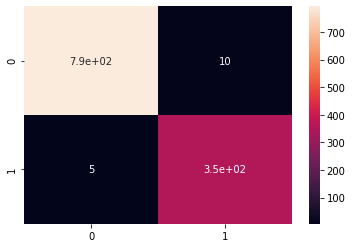

In [24]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

Author: Purvit Vashishtha